## Import Package

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets
import matplotlib.pyplot as plt
from torchvision import transforms
import torch.nn.functional as F

## Datasets (CIFAR10)

In [5]:
data_path='./cifar10_datasets/'
cifar10_train=datasets.CIFAR10(data_path, train=True, download=True,transform=transforms.ToTensor())
cifar10_val=datasets.CIFAR10(data_path, train=False, download=True, transform=transforms.ToTensor())
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## Plot the Figures

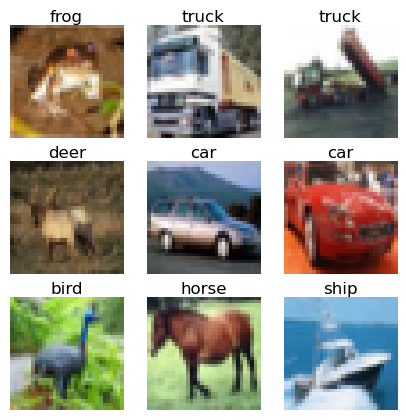

In [8]:
plt.figure(figsize=(5,5))
for i in range(9):
    img, label=cifar10_train[i]
    plt.subplot(3,3,i+1)
    #img.shape
    plt.imshow(img.permute(1,2,0))
    plt.axis('off')
    plt.title(classes[label], x=0.5, y=0.96)
plt.show()

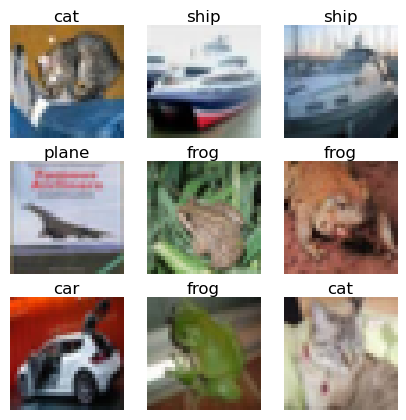

In [10]:
plt.figure(figsize=(5,5))
for i in range(9):
    img, label=cifar10_val[i]
    plt.subplot(3,3,i+1)
    #img.shape
    plt.imshow(img.permute(1,2,0))
    plt.axis('off')
    plt.title(classes[label], x=0.5, y=0.96)
plt.show()

## Normalization

In [13]:
imgs=torch.stack([img for img, _ in cifar10_train], dim=-1)
imgs.shape
imgs_t=imgs.view(3,-1)
imgs_t.shape
imgs_mean=imgs_t.mean(dim=1)
imgs_std=imgs_t.std(dim=1)

In [15]:
normalize_cifar10_train=datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize(imgs_mean, imgs_std)]))
normalize_cifar10_val=datasets.CIFAR10(data_path, train=False, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize(imgs_mean, imgs_std)]))

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9892126..2.0945773].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.909839..2.1008143].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.658118..2.1267893].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7708598..1.7254728].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9892126..2.0429673].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8997078..2.0112178].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8622148.

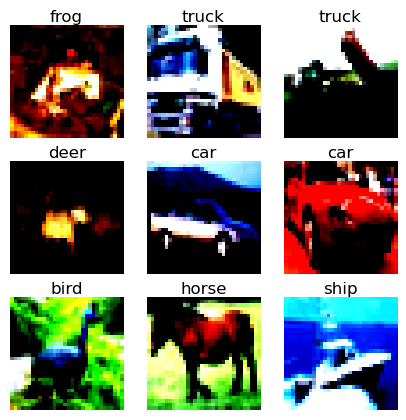

In [17]:
plt.figure(figsize=(5,5))
for i in range(9):
    img, label=normalize_cifar10_train[i]
    plt.subplot(3,3,i+1)
    plt.imshow(img.permute(1,2,0))
    plt.axis('off')
    plt.title(classes[label], x=0.5, y=0.96)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7828412..2.0945773].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9892126..1.9958744].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9257137..2.0708315].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.44874..1.8009862].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8780895..1.5630796].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9158138..1.3603542].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9733379.

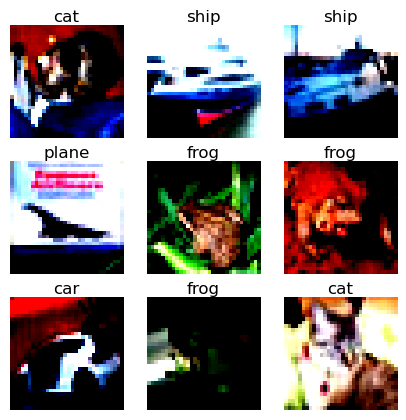

In [19]:
plt.figure(figsize=(5,5))
for i in range(9):
    img, label=normalize_cifar10_val[i]
    plt.subplot(3,3,i+1)
    plt.imshow(img.permute(1,2,0))
    plt.axis('off')
    plt.title(classes[label], x=0.5, y=0.96)
plt.show()

## Configurations

In [22]:
''' Homework!!! You have to fill the number in this block to achieve basic score '''
input_dim=3072
lr=0.001 # learning rate, suggest from 1e-3 to 1e-5
batch_size=64 # batch size, suggest 10~250
n_epoch=1000  # number of epoch, suggest from 1000 to 5000
best_loss=100000 # initial best loss, suggest large enogh like 100000
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Basic Model

In [25]:
''' Homework!!! You have to fill the number in this block to achieve basic score '''
class Basic_Convnet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3, 5, kernel_size=3, padding=1)
        self.act1=nn.Tanh()
        self.pool1=nn.MaxPool2d(2)
        #self.dropout1=nn.Dropout2d(p=xx)
        self.conv2=nn.Conv2d(5, 8, kernel_size=3, padding=1)
        self.act2=nn.Tanh()
        self.pool2=nn.MaxPool2d(2)
        #self.dropout2=nn.Dropout2d(p=xx)
        self.linear1=nn.Linear(8*8*8, 12)
        self.act3=nn.Tanh()
        self.linear2=nn.Linear(12, 10)

    def forward(self, x):
        out=self.pool1(self.act1(self.conv1(x)))
        #out=self.dropout1(XX)
        out=self.pool2(self.act2(self.conv2(out)))
        #out=self.dropout2(XX)
        out=out.view(-1,8*8*8)
        out=self.linear2(self.act3(self.linear1(out)))
        return out

## Intermediate Model
> Add *Dropout layer* based on basic model structure.



In [28]:
''' Intermediate Level'''
class Intermediate_Convnet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3, 5, kernel_size=3, padding=1)
        self.act1=nn.Tanh()
        self.pool1=nn.MaxPool2d(2)
        self.dropout1=nn.Dropout2d(0.3)
        self.conv2=nn.Conv2d(5, 8, kernel_size=3, padding=1)
        self.act2=nn.Tanh()
        self.pool2=nn.MaxPool2d(2)
        self.dropout2=nn.Dropout2d(0.4)
        self.linear1=nn.Linear(8*8*8, 12)
        self.act3=nn.Tanh()
        self.linear2=nn.Linear(12, 10)

    def forward(self, x):
        out=self.pool1(self.act1(self.conv1(x)))
        out=self.dropout1(out)
        out=self.pool2(self.act2(self.conv2(out)))
        out=self.dropout2(out)
        out=out.view(-1,8*8*8)
        out=self.act3(self.linear1(out))
        out=self.linear2(out)
        return out

## Advanced Model
> The architecture has **"three convolution blocks"** & **"two fully connected layers"**. Each convolution block uses *Batch Normalization*, *ReLU activation function* and *Dropout layer* with *Max Pooling* operation.

In [31]:
''' Advanced Level'''
class Advanced_Convnet(nn.Module):
    def __init__(self):
        super(Advanced_Convnet, self).__init__()

        # First layer of convolution blocks
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout2d(0.2)

        # Second layer of convolution blocks
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.dropout2 = nn.Dropout2d(0.3)

        # Third layer of convolution blocks
        self.conv5 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(128)
        self.conv6 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn6 = nn.BatchNorm2d(128)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.dropout3 = nn.Dropout2d(0.4)

        # Fully connecting layer
        self.fc1 = nn.Linear(128 * 4 * 4, 128)
        self.bn7 = nn.BatchNorm1d(128)
        self.dropout4 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # First layer of convolution blocks
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool1(x)
        x = self.dropout1(x)

        # Second layer of convolution blocks
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool2(x)
        x = self.dropout2(x)

        # Third layer of convolution blocks
        x = F.relu(self.bn5(self.conv5(x)))
        x = F.relu(self.bn6(self.conv6(x)))
        x = self.pool3(x)
        x = self.dropout3(x)

        # Flatten
        x = x.view(-1, 128 * 4 * 4)

        # Fully connecting layer
        x = F.relu(self.bn7(self.fc1(x)))
        x = self.dropout4(x)
        x = self.fc2(x)

        return x

In [33]:
Basic_conv=Basic_Convnet().to(device)
Intermediate_conv=Intermediate_Convnet().to(device)
Advanced_conv=Advanced_Convnet().to(device)

## Total Number of Model Parameters

In [36]:
''' Advanced Level'''
print('Basic Model Total Parameters:', sum(torch.numel(p) for p in Basic_conv.parameters()))
print('Intermediate Model Total Parameters:', sum(torch.numel(p) for p in Intermediate_conv.parameters()))
print('Advanced Model Total Parameters:', sum(torch.numel(p) for p in Advanced_conv.parameters()))

Basic Model Total Parameters: 6794
Intermediate Model Total Parameters: 6794
Advanced Model Total Parameters: 551722


## Loss Function

In [39]:
loss_fn=nn.CrossEntropyLoss()

## Optimizer

In [42]:
optimizer_1 = optim.SGD(Basic_conv.parameters(), lr, momentum=0.9)
optimizer_2 = optim.SGD(Intermediate_conv.parameters(), lr, momentum=0.9)
optimizer_3 = optim.SGD(Advanced_conv.parameters(), lr, momentum=0.9)

## DataLoader

In [45]:
train_loader=torch.utils.data.DataLoader(normalize_cifar10_train, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader=torch.utils.data.DataLoader(normalize_cifar10_val, batch_size=batch_size, shuffle=True)

## Training Loop

In [48]:
def train(model, n_epoch, loss_fn, optimizer, train_loader, val_loader, model_name, best_loss):
    for epoch in range(n_epoch):
        model.train()
        for img, label in train_loader:
            img, label = img.to(device), label.to(device)
            label_p = model(img)
            loss = loss_fn(label_p, label)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        model.eval()
        for img, label in val_loader:
            img, label = img.to(device), label.to(device)
            with torch.no_grad():
                label_vp = model(img)
                val_loss = loss_fn(label_vp, label)
                if val_loss < best_loss:
                    best_loss = val_loss
                    torch.save(model.state_dict(), f'./{model_name}_best_model_conv_s.pt')
                    print(f"Saving best model for {model_name} with best loss: {best_loss}")
        print(f"Epoch: {epoch}, Loss: {loss.item()}")

## Training Basic Model !

In [ ]:
train(model=Basic_conv, n_epoch=n_epoch, loss_fn=loss_fn, optimizer=optimizer_1,
      train_loader=train_loader, val_loader=val_loader, model_name="Basic", best_loss=best_loss)

Saving best model for Basic with best loss: 1.7337539196014404
Saving best model for Basic with best loss: 1.6685538291931152
Epoch: 0, Loss: 1.9514226913452148
Saving best model for Basic with best loss: 1.6400922536849976
Saving best model for Basic with best loss: 1.6198899745941162
Saving best model for Basic with best loss: 1.6189844608306885
Saving best model for Basic with best loss: 1.6012349128723145
Saving best model for Basic with best loss: 1.5935543775558472
Epoch: 1, Loss: 1.5205488204956055
Saving best model for Basic with best loss: 1.577406644821167
Saving best model for Basic with best loss: 1.5186530351638794
Saving best model for Basic with best loss: 1.4631949663162231
Saving best model for Basic with best loss: 1.4507659673690796
Saving best model for Basic with best loss: 1.3241509199142456
Epoch: 2, Loss: 1.6693391799926758
Saving best model for Basic with best loss: 1.3020036220550537
Saving best model for Basic with best loss: 1.301400065422058
Epoch: 3, Loss:

## Validation Basic Model !

Correction (Basic Model): 4.0%
Correction (Basic Model): 4.0%
Correction (Basic Model): 8.0%
Correction (Basic Model): 8.0%
Correction (Basic Model): 12.0%
Correction (Basic Model): 16.0%
Correction (Basic Model): 20.0%
Correction (Basic Model): 24.0%
Correction (Basic Model): 28.000000000000004%
Correction (Basic Model): 32.0%
Correction (Basic Model): 36.0%
Correction (Basic Model): 40.0%
Correction (Basic Model): 44.0%
Correction (Basic Model): 48.0%
Correction (Basic Model): 52.0%
Correction (Basic Model): 52.0%
Correction (Basic Model): 56.00000000000001%
Correction (Basic Model): 60.0%
Correction (Basic Model): 64.0%
Correction (Basic Model): 68.0%
Correction (Basic Model): 72.0%
Correction (Basic Model): 76.0%
Correction (Basic Model): 80.0%
Correction (Basic Model): 84.0%
Correction (Basic Model): 84.0%


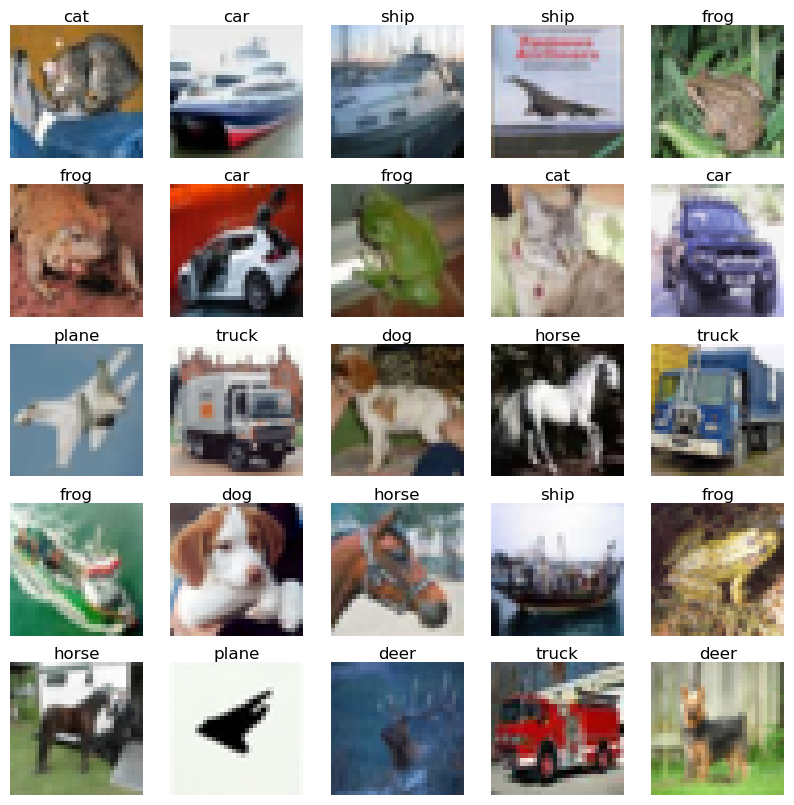

In [ ]:
correction=0
Basic_conv.load_state_dict(torch.load('./Basic_best_model_conv_s.pt', weights_only=True))
Basic_conv.eval()
plt.figure(figsize=(10,10))
for i in range(25):
    img, label=cifar10_val[i]
    plt.subplot(5,5,i+1)
    plt.imshow(img.permute(1,2,0))
    plt.axis('off')
    imgs, _=normalize_cifar10_val[i]
    imgs=imgs.to(device)
    imgs=imgs.unsqueeze(0)
    imgs=imgs
    imgs_p=Basic_conv(imgs)
    _, label_p=torch.max(imgs_p, dim=1)
    plt.title(classes[label_p], x=0.5, y=0.96)
    if label_p==label:
        correction=correction+1
        correction_ratio=correction/25*100
    print(f"Correction (Basic Model): {correction_ratio}%")

## Training Intermediate Model !

In [ ]:
''' Intermediate Level'''
train(model=Intermediate_conv, n_epoch=n_epoch, loss_fn=loss_fn, optimizer=optimizer_2,
      train_loader=train_loader, val_loader=val_loader, model_name="Intermediate", best_loss=best_loss)

Saving best model for Intermediate with best loss: 1.3537163734436035
Saving best model for Intermediate with best loss: 1.324816107749939
Saving best model for Intermediate with best loss: 1.2734627723693848
Saving best model for Intermediate with best loss: 1.2472615242004395
Saving best model for Intermediate with best loss: 1.2073357105255127
Saving best model for Intermediate with best loss: 1.1886112689971924
Epoch: 0, Loss: 1.31685209274292
Epoch: 1, Loss: 1.5518895387649536
Saving best model for Intermediate with best loss: 1.1442943811416626
Epoch: 2, Loss: 1.6423864364624023
Saving best model for Intermediate with best loss: 1.0931867361068726
Epoch: 3, Loss: 1.8595930337905884
Epoch: 4, Loss: 1.8041729927062988
Epoch: 5, Loss: 1.606384515762329
Epoch: 6, Loss: 1.4121668338775635
Epoch: 7, Loss: 1.6129999160766602
Epoch: 8, Loss: 1.7814054489135742
Epoch: 9, Loss: 1.1737053394317627
Epoch: 10, Loss: 1.6879003047943115
Epoch: 11, Loss: 1.4902526140213013
Epoch: 12, Loss: 1.800

## Validation Intermediate Model !

Correction (Intermediate Model): 80.0%
Correction (Intermediate Model): 4.0%
Correction (Intermediate Model): 8.0%
Correction (Intermediate Model): 12.0%
Correction (Intermediate Model): 16.0%
Correction (Intermediate Model): 20.0%
Correction (Intermediate Model): 24.0%
Correction (Intermediate Model): 28.000000000000004%
Correction (Intermediate Model): 28.000000000000004%
Correction (Intermediate Model): 32.0%
Correction (Intermediate Model): 36.0%
Correction (Intermediate Model): 40.0%
Correction (Intermediate Model): 40.0%
Correction (Intermediate Model): 44.0%
Correction (Intermediate Model): 48.0%
Correction (Intermediate Model): 48.0%
Correction (Intermediate Model): 52.0%
Correction (Intermediate Model): 56.00000000000001%
Correction (Intermediate Model): 60.0%
Correction (Intermediate Model): 64.0%
Correction (Intermediate Model): 68.0%
Correction (Intermediate Model): 72.0%
Correction (Intermediate Model): 72.0%
Correction (Intermediate Model): 76.0%
Correction (Intermediate 

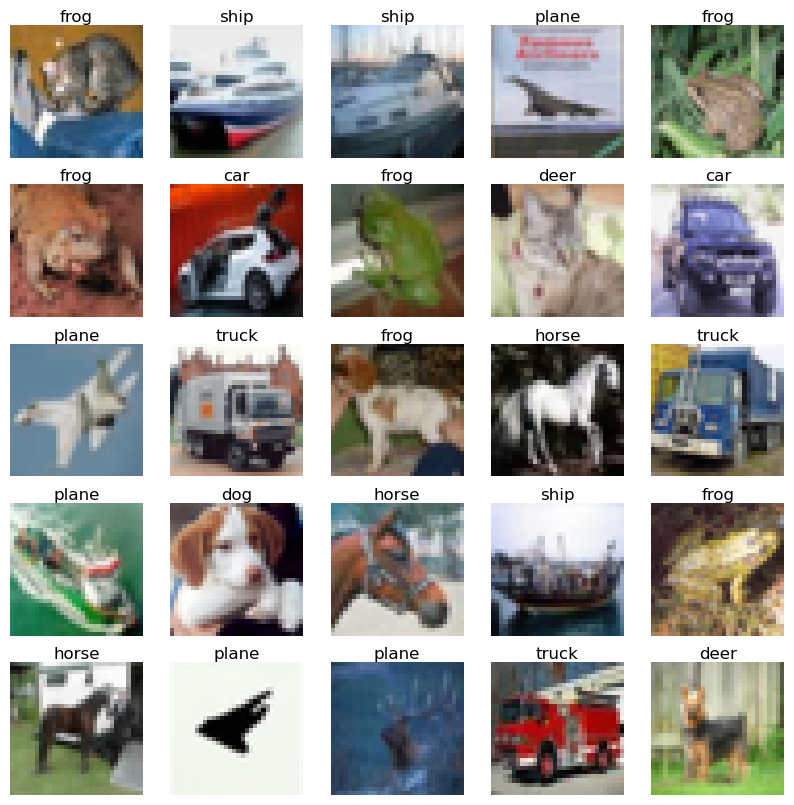

In [ ]:
''' Intermediate Level'''
correction=0
Intermediate_conv.load_state_dict(torch.load('./Intermediate_best_model_conv_s.pt', weights_only=True))
Intermediate_conv.eval()
plt.figure(figsize=(10,10))
for i in range(25):
    img, label=cifar10_val[i]
    plt.subplot(5,5,i+1)
    plt.imshow(img.permute(1,2,0))
    plt.axis('off')
    imgs, _=normalize_cifar10_val[i]
    imgs=imgs.to(device)
    imgs=imgs.unsqueeze(0)
    imgs=imgs
    imgs_p=Intermediate_conv(imgs)
    _, label_p=torch.max(imgs_p, dim=1)
    plt.title(classes[label_p], x=0.5, y=0.96)
    if label_p==label:
        correction=correction+1
        correction_ratio=correction/25*100
    print(f"Correction (Intermediate Model): {correction_ratio}%")

## Training Advanced Model !

In [50]:
''' Advanced Level'''
train(model=Advanced_conv, n_epoch=400, loss_fn=loss_fn, optimizer=optimizer_3,
      train_loader=train_loader, val_loader=val_loader, model_name="Advanced", best_loss=best_loss)

Saving best model for Advanced with best loss: 1.300372838973999
Saving best model for Advanced with best loss: 1.2313854694366455
Saving best model for Advanced with best loss: 1.2219923734664917
Epoch: 0, Loss: 1.4711931943893433
Saving best model for Advanced with best loss: 1.0938209295272827
Saving best model for Advanced with best loss: 1.0817443132400513
Saving best model for Advanced with best loss: 1.0799068212509155
Saving best model for Advanced with best loss: 1.0455349683761597
Saving best model for Advanced with best loss: 1.0451874732971191
Saving best model for Advanced with best loss: 1.0374975204467773
Epoch: 1, Loss: 1.5500843524932861
Saving best model for Advanced with best loss: 1.0284175872802734
Saving best model for Advanced with best loss: 1.026637077331543
Saving best model for Advanced with best loss: 0.9706940650939941
Saving best model for Advanced with best loss: 0.9554080963134766
Saving best model for Advanced with best loss: 0.9350171685218811
Saving b

## Validation Advanced Model !

Correction (Advanced Model): 4.0%
Correction (Advanced Model): 8.0%
Correction (Advanced Model): 12.0%
Correction (Advanced Model): 16.0%
Correction (Advanced Model): 20.0%
Correction (Advanced Model): 24.0%
Correction (Advanced Model): 28.000000000000004%
Correction (Advanced Model): 32.0%
Correction (Advanced Model): 36.0%
Correction (Advanced Model): 40.0%
Correction (Advanced Model): 44.0%
Correction (Advanced Model): 48.0%
Correction (Advanced Model): 52.0%
Correction (Advanced Model): 56.00000000000001%
Correction (Advanced Model): 60.0%
Correction (Advanced Model): 64.0%
Correction (Advanced Model): 68.0%
Correction (Advanced Model): 72.0%
Correction (Advanced Model): 76.0%
Correction (Advanced Model): 80.0%
Correction (Advanced Model): 84.0%
Correction (Advanced Model): 88.0%
Correction (Advanced Model): 92.0%
Correction (Advanced Model): 96.0%
Correction (Advanced Model): 96.0%


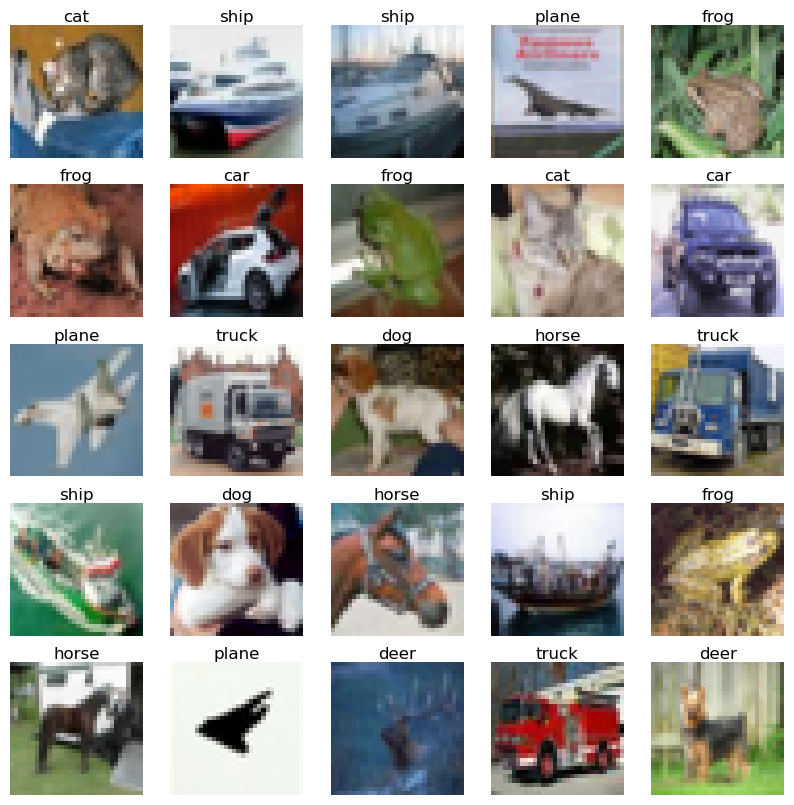

In [52]:
''' Advanced Level'''
correction=0
Advanced_conv.load_state_dict(torch.load('./Advanced_best_model_conv_s.pt', weights_only=True))
Advanced_conv.eval()
plt.figure(figsize=(10,10))
for i in range(25):
    img, label=cifar10_val[i]
    plt.subplot(5,5,i+1)
    plt.imshow(img.permute(1,2,0))
    plt.axis('off')
    imgs, _=normalize_cifar10_val[i]
    imgs=imgs.to(device)
    imgs=imgs.unsqueeze(0)
    imgs=imgs
    imgs_p=Advanced_conv(imgs)
    _, label_p=torch.max(imgs_p, dim=1)
    plt.title(classes[label_p], x=0.5, y=0.96)
    if label_p==label:
        correction=correction+1
        correction_ratio=correction/25*100
    print(f"Correction (Advanced Model): {correction_ratio}%")